In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# connection engine using uri
engine = create_engine("")

# string de SQL de ejemplo para hacer la query a la DB
sql_str = 'SELECT * FROM student LIMIT 10'

In [4]:
df_students = pd.read_sql(sql_str, engine)

In [ ]:
df_students.head()

# Cargar DataFrames

In [10]:
# questions
limit = None
table = 'question'
sql_str = f'SELECT * FROM {table} LIMIT {limit}' if limit else f'SELECT * FROM {table}'
df_questions = pd.read_sql(sql_str, engine)
df_questions.head()

,id,statement,weight,assessment_id
0,1,SEPA Lenguaje 1° Básico 2012 A Pregunta 1,1,1
1,2,SEPA Lenguaje 1° Básico 2012 A Pregunta 2,1,1
2,3,SEPA Lenguaje 1° Básico 2012 A Pregunta 3,1,1
3,4,SEPA Lenguaje 1° Básico 2012 A Pregunta 4,1,1
4,5,SEPA Lenguaje 1° Básico 2012 A Pregunta 5,1,1


In [11]:
# indicators
limit = None
table = 'indicator'
sql_str = f'SELECT * FROM {table} LIMIT {limit}' if limit else f'SELECT * FROM {table}'
df_indicators = pd.read_sql(sql_str, engine)
df_indicators.head()

,id,description,type,questionId
0,1,Inferir el significado de palabras a partir de...,evaluation,1
1,2,Identificar hechos en narraciones.,evaluation,2
2,3,Reconocer tipos de textos literarios.,evaluation,3
3,4,Identificar acciones de personajes en un texto...,evaluation,4
4,5,Identificar relaciones causales en un texto li...,evaluation,5


In [12]:
# answers
limit = None
table = 'answer'
sql_str = f'SELECT * FROM {table} LIMIT {limit}' if limit else f'SELECT * FROM {table}'
df_indicators = pd.read_sql(sql_str, engine)
df_indicators.head()

,id,score,question_id,student_id,form_id
0,1,1,1,1,1
1,2,1,2,1,1
2,3,1,3,1,1
3,4,1,4,1,1
4,5,1,5,1,1


In [13]:
# form
limit = None
table = 'form'
sql_str = f'SELECT * FROM {table} LIMIT {limit}' if limit else f'SELECT * FROM {table}'
df_indicators = pd.read_sql(sql_str, engine)
df_indicators.head()

,id,identifier,assessment_id
0,1,A,1
1,2,A,2
2,3,A,3
3,4,A,4
4,5,A,5


In [14]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1076 non-null   int64 
 1   identifier     1076 non-null   object
 2   assessment_id  1076 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.3+ KB


# Análisis descriptivo de los datos


### 🔎 1. Desempeño de los Estudiantes

In [ ]:
# Consulta SQL para calcular el promedio de puntaje por estudiante
sql_str = """
SELECT 
    s.id AS student_id,
    s.fullname AS student_name,
    ROUND(AVG(a.score), 2) AS average_score,
    COUNT(a.id) AS num_answers
FROM answer a
JOIN student s ON s.id = a.student_id
GROUP BY s.id, s.fullname
ORDER BY average_score DESC;
"""
df_student_perf = pd.read_sql(sql_str, engine)
df_student_perf.head()



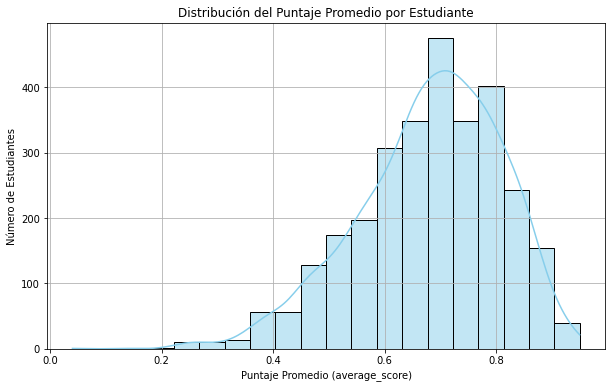

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_student_perf['average_score'], bins=20, kde=True, color='skyblue')

plt.title('Distribución del Puntaje Promedio por Estudiante')
plt.xlabel('Puntaje Promedio (average_score)')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()


In [22]:
sql_str = """
SELECT 
    s.id AS student_id,
    s.fullname AS student_name,
    sec.name AS section_name,
    subj.name AS subject_name,
    ROUND(AVG(a.score), 2) AS average_score,
    COUNT(a.id) AS num_answers
FROM answer a
JOIN student s ON s.id = a.student_id
JOIN form f ON a.form_id = f.id
JOIN assessment asmt ON f.assessment_id = asmt.id
JOIN section sec ON asmt.section_id = sec.id
JOIN subject subj ON sec.subject_id = subj.id
GROUP BY s.id, s.fullname, sec.name, subj.name
ORDER BY average_score DESC;
"""

df_score_by_student_section = pd.read_sql(sql_str, engine)
df_score_by_student_section.head()


,student_id,student_name,section_name,subject_name,average_score,num_answers
0,453,Julian,Matemática 5° Básico 2013 A,Departamento Matemática 5° Básico 2013,1.0,40
1,54,Jose Tomas,Matemática 2° Básico 2013 B,Departamento Matemática 2° Básico 2013,1.0,30
2,1850,Paz Trinidad,Matemática 6° Básico 2021 D,Departamento Matemática 6° Básico 2021,1.0,40
3,1644,Raul,Matemática 5° Básico 2019 B,Departamento Matemática 5° Básico 2019,1.0,40
4,1850,Paz Trinidad,Lenguaje 2° Básico 2017 D,Departamento Lenguaje 2° Básico 2017,1.0,30


### 📋 2. Calidad o Eficacia de las Evaluaciones

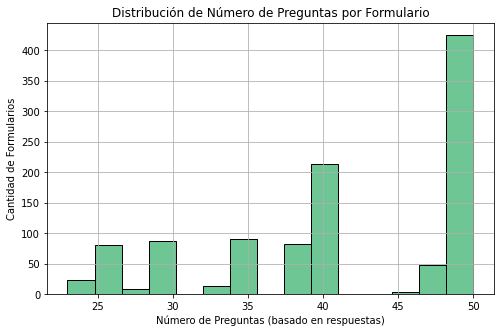

In [29]:
sql_str = """
SELECT 
    f.id AS form_id,
    COUNT(DISTINCT a.question_id) AS num_questions
FROM form f
JOIN answer a ON a.form_id = f.id
GROUP BY f.id
ORDER BY num_questions DESC;
"""

df_questions_per_form = pd.read_sql(sql_str, engine)

# Gráfico
plt.figure(figsize=(8, 5))
sns.histplot(df_questions_per_form['num_questions'], bins=15, color='mediumseagreen')
plt.title('Distribución de Número de Preguntas por Formulario')
plt.xlabel('Número de Preguntas (basado en respuestas)')
plt.ylabel('Cantidad de Formularios')
plt.grid(True)
plt.show()


In [30]:
sql_str = """
SELECT 
    f.id AS form_id,
    f.identifier,
    ROUND(AVG(a.score), 2) AS average_score,
    COUNT(a.id) AS num_answers
FROM form f
JOIN answer a ON a.form_id = f.id
GROUP BY f.id, f.identifier
ORDER BY average_score ASC;
"""

df_form_scores = pd.read_sql(sql_str, engine)
df_form_scores.head()


,form_id,identifier,average_score,num_answers
0,678,A,0.08,40
1,992,A,0.12,25
2,556,A,0.16,25
3,487,A,0.18,40
4,393,A,0.20,40


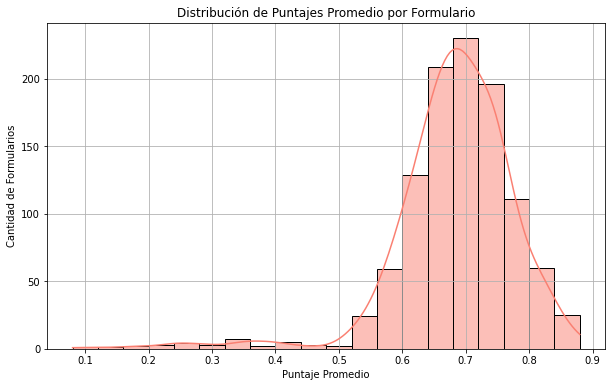

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_form_scores['average_score'], bins=20, kde=True, color='salmon')
plt.title('Distribución de Puntajes Promedio por Formulario')
plt.xlabel('Puntaje Promedio')
plt.ylabel('Cantidad de Formularios')
plt.grid(True)
plt.show()


In [33]:
# Formularios más difíciles
df_form_scores.sort_values(by='average_score').head(5)



,form_id,identifier,average_score,num_answers
0,678,A,0.08,40
1,992,A,0.12,25
2,556,A,0.16,25
3,487,A,0.18,40
4,393,A,0.20,40


In [34]:

# Formularios más fáciles
df_form_scores.sort_values(by='average_score', ascending=False).head(5)

,form_id,identifier,average_score,num_answers
1075,300,A,0.88,1040
1074,206,A,0.88,1160
1073,296,A,0.88,1080
1072,558,A,0.88,25
1071,386,A,0.88,1160


### 🧠 3. Análisis de las preguntas

##### Obtener cantidades de cada indicador

In [67]:
# string de SQL 
sql_str = 'SELECT * FROM indicator'

df_indicators = pd.read_sql(sql=sql_text(sql_str), con=engine.connect()) # para versiones mas nuevas de sqlalchemy
df_indicators.head()

# agrupar df_indicator por 'description' y obtener los counts
counts = df_indicators.groupby('description').size().reset_index(name='count')
counts

,description,count
0,* Asociar una figura 3D (esfera) con objetos d...,4
1,* Atribuir el propósito comunicativo de textos...,4
2,* Atribuir el propósito comunicativo de textos...,4
3,* Atribuir el propósito comunicativo de textos...,174
4,* Atribuir el propósito comunicativo de un tex...,4
...,...,...
3742,Ubicar números representados en diferentes tra...,16
3743,Usar muestreo aleatorio simple para inferir po...,4
3744,Valorizar una expresión algebraica no fraccion...,20
3745,Valorizar una expresión algebraica no fraccion...,8


In [68]:
# ordenar por count
counts = counts.sort_values(by='count', ascending=False)
counts

,description,count
1630,Distinguir el tema central de diversos textos.,525
1164,Atribuir el propósito comunicativo de textos n...,512
2762,Inferir relaciones que permiten comprender el ...,512
2627,Inferir el significado de palabras no familiar...,373
1768,Identificar datos de un texto relacionando inf...,288
...,...,...
2320,Identificar las causas y consecuencias de acci...,4
966,*Identificar ángulos congruentes en figuras ro...,4
967,*Inferir actitudes de personajes en narraciones.,4
2316,Identificar lados paralelos en figuras geométr...,4


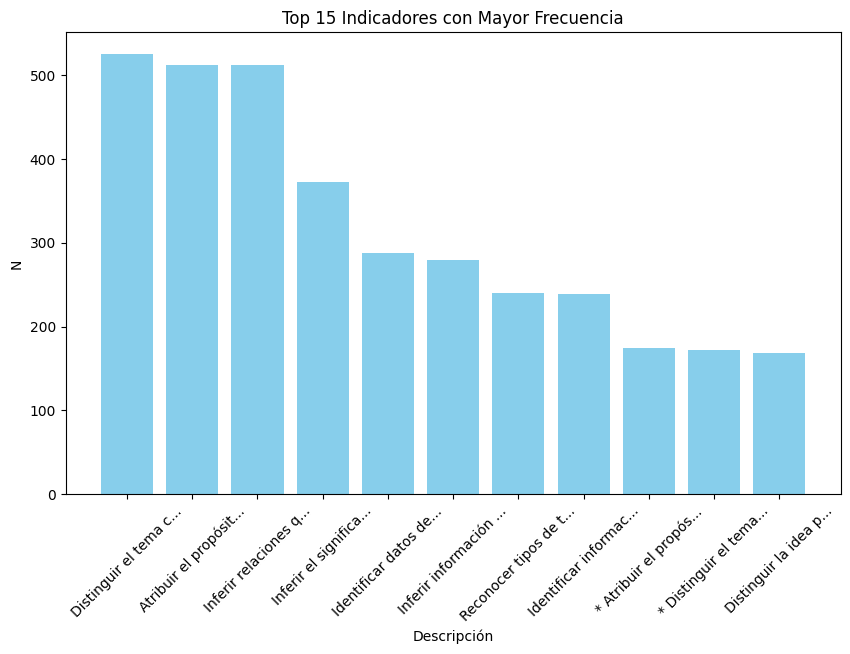

In [70]:
import matplotlib.pyplot as plt

# preprocesar labels para que tengan largo <= 20
labels = counts['description'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)[:15]

# graficar los top 15 indicadores con mayor count
plt.figure(figsize=(10, 6))
plt.bar(labels, counts['count'].head(15), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Descripción')
plt.ylabel('N')
plt.title('Top 15 Indicadores con Mayor Frecuencia')
plt.show()

## Obtener estadísticas de los puntajes de cada prueba
Usamos la columna `score` de la tabla `question`

In [ ]:
limit = None
sql_str = f'SELECT * FROM answer LIMIT {limit}' if limit else 'SELECT * FROM answer'
df_answers = pd.read_sql(sql_str, engine)

sql_str = f'SELECT * FROM question LIMIT {limit}' if limit else 'SELECT * FROM question'
df_questions = pd.read_sql(sql_str, engine)

sql_str = f'SELECT * FROM assessment LIMIT {limit}' if limit else 'SELECT * FROM assessment'
df_assessments = pd.read_sql(sql_str, engine)

In [ ]:
# cruzar df_answers (con 'question_id') con df_questions ('id')
df_aq = pd.merge(df_answers, df_questions, left_on='question_id', right_on='id', how='left')
# cruzar df_aq ('assessment_id') con df_assesments ('id')
df_aq_a = pd.merge(df_aq, df_assessments, left_on='assessment_id', right_on='id', how='left')
# agrupar por assessment y obtener estadisticas de la columna 'score'
score_stats = df_aq_a.groupby('assessment_id')['score'].describe()
# crear df con columna 'name' (del assessment) y columnas de score_stats
df_score_stats = pd.DataFrame({
    'name': df_assessments.set_index('id').loc[score_stats.index]['name'],
    'mean': score_stats['mean'],
    'std': score_stats['std'],
    'min': score_stats['min'],
    '25%': score_stats['25%'],
    '50%': score_stats['50%'],
    '75%': score_stats['75%'],
    'max': score_stats['max']
})
df_score_stats

Deberíamos tener algo como $$ 12 \text{ (años) } \times 2 \text{ (pruebas) } \times 4 \text{ (cursos) } \times 11 \text{ (generaciones)} \approx 1144 $$

# PAES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# cargamos datos de PAES 2023 y 2024
df_paes = pd.read_excel('../Datos/paes_encrypted.xlsx', skiprows=1)
df_paes

## Estadísticas básicas

In [4]:
cols = df_paes.columns
print(cols)

Index(['Nombre', 'RUT', 'Admisión', 'C. Lectora', 'Matemática', 'M2',
       'Historia', 'Ciencias'],
      dtype='object')


In [5]:
df_paes_2023 = df_paes[df_paes['Admisión'] == 2023].copy()
df_paes_2024 = df_paes[df_paes['Admisión'] == 2024].copy()
df_paes_2025 = df_paes[df_paes['Admisión'] == 2025].copy()

In [6]:
n_rows_2023, n_rows_2024, n_rows_2025 = df_paes_2023.shape[0], df_paes_2024.shape[0], df_paes_2025.shape[0]
print(f'PAES 2023: {n_rows_2023} datos', f'PAES 2024: {n_rows_2024} datos', f'PAES 2025: {n_rows_2025} datos')

PAES 2023: 115 datos PAES 2024: 109 datos PAES 2025: 100 datos


In [8]:
nombre_pruebas = ['C. Lectora', 'Matemática', 'Historia', 'Ciencias', 'M2']
# para cada año guardamos los puntajes en un diccionario de las distintas pruebas
puntajes_2023 = df_paes_2023[nombre_pruebas].replace('-', np.nan)
puntajes_2024 = df_paes_2024[nombre_pruebas].replace('-', np.nan)
puntajes_2025 = df_paes_2025[nombre_pruebas].replace('-', np.nan)

In [9]:
# obtener cantidad de puntajes faltantes por prueba
faltantes_2023 = puntajes_2023.isnull().sum()
faltantes_2024 = puntajes_2024.isnull().sum()
faltantes_2025 = puntajes_2025.isnull().sum()
print("Cantidad de puntajes faltantes en 2023 :\n", faltantes_2023)
print("Cantidad de puntajes faltantes en 2024 :\n", faltantes_2024)
print("Cantidad de puntajes faltantes en 2025 :\n", faltantes_2025)

Cantidad de puntajes faltantes en 2023 :
 C. Lectora     1
Matemática     1
Historia      39
Ciencias      39
M2            48
dtype: int64
Cantidad de puntajes faltantes en 2024 :
 C. Lectora     0
Matemática     0
Historia      27
Ciencias      58
M2            20
dtype: int64
Cantidad de puntajes faltantes en 2025 :
 C. Lectora     0
Matemática     0
Historia      28
Ciencias      75
M2            63
dtype: int64


### Graficar considerando los puntajes 0 

Por ejemplo, alumnos que no dieron la prueba de ciencias.

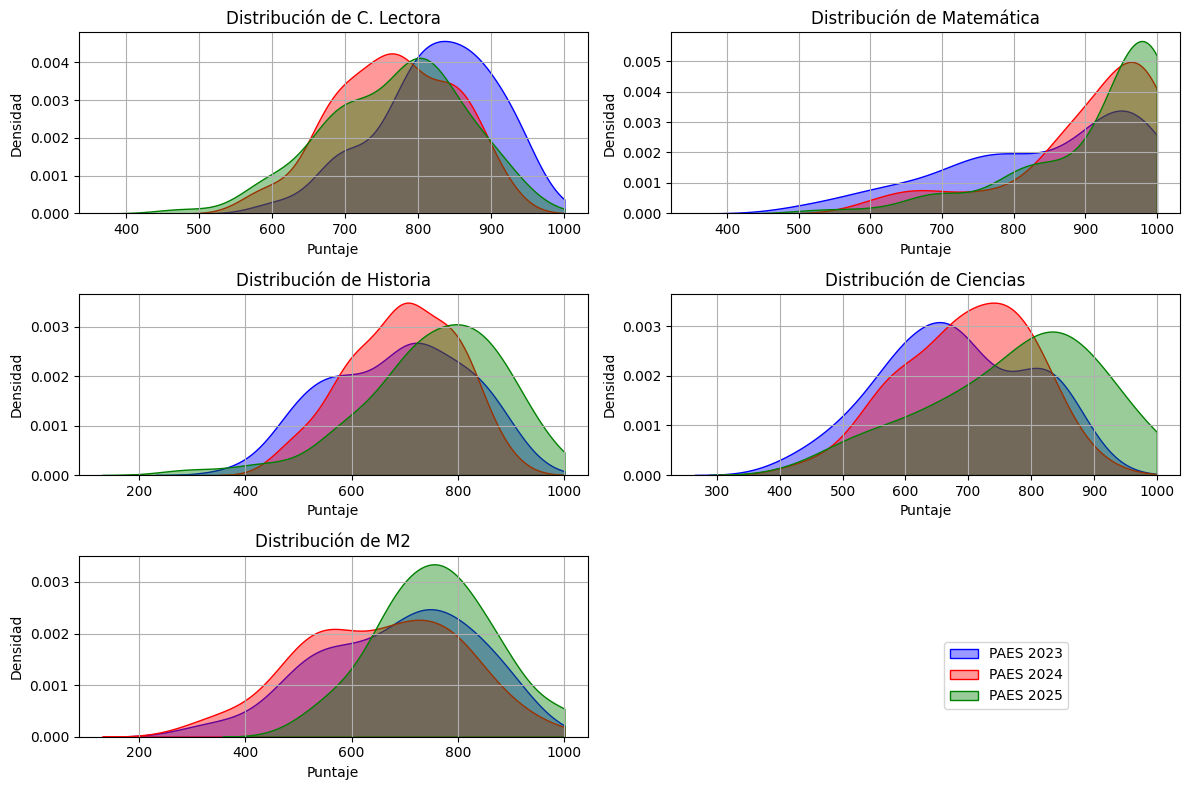

In [11]:
# graficamos los puntajes de cada prueba
# queremos un grafico por cada prueba
plt.figure(figsize=(12, 8))
for prueba in nombre_pruebas:
    plt.subplot(3, 2, nombre_pruebas.index(prueba) + 1)
    sns.kdeplot(puntajes_2023[prueba], fill=True, alpha=0.4, color='blue', gridsize=200, clip=(0, 1000))
    sns.kdeplot(puntajes_2024[prueba], fill=True, alpha=0.4, color='red', gridsize=200, clip=(0, 1000))
    sns.kdeplot(puntajes_2025[prueba], fill=True, alpha=0.4, color='green', gridsize=200, clip=(0, 1000))
    #plt.hist([puntajes_2023[prueba], puntajes_2024[prueba]], bins=20, color=['blue', 'red'], alpha=0.5, label=['PAES 2023', 'PAES 2024'])
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Densidad')
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024', 'PAES 2025'], bbox_to_anchor=(0.9, 0.2))
plt.show()

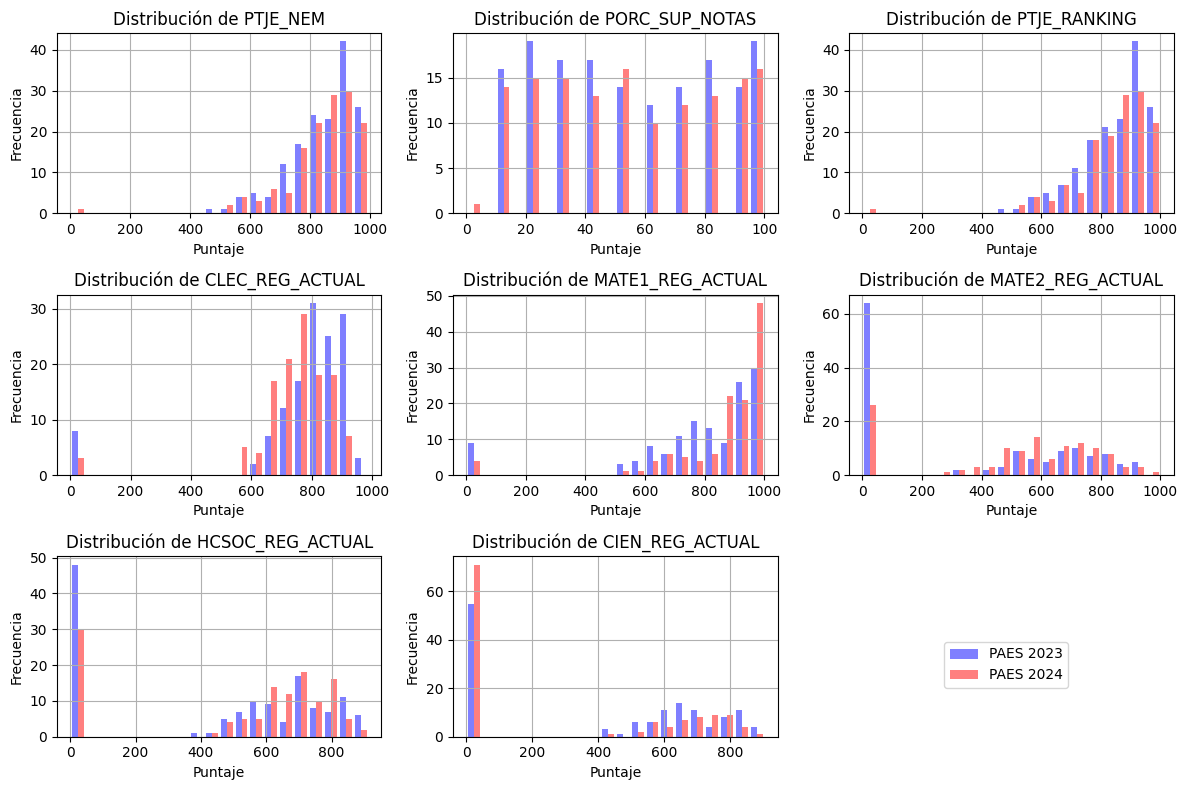

In [19]:
# graficamos los puntajes de cada prueba
# queremos un grafico por cada prueba
plt.figure(figsize=(12, 8))
for prueba in nombre_pruebas:
    plt.subplot(3, 3, nombre_pruebas.index(prueba) + 1)
    #sns.kdeplot(puntajes_2023[prueba], fill=True, alpha=0.5, palette='Blues')
    #sns.histplot(puntajes_2023[prueba], fill=True, alpha=0.5, color='blue')
    #sns.kdeplot(puntajes_2024[prueba], fill=True, alpha=0.5, palette='Reds')
    #sns.histplot(puntajes_2024[prueba], fill=True, alpha=0.5, color='red')
    plt.hist([puntajes_2023[prueba], puntajes_2024[prueba]], bins=20, color=['blue', 'red'], alpha=0.5, label=['PAES 2023', 'PAES 2024'])
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Frecuencia')
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024'], bbox_to_anchor=(0.9, 0.2))
plt.show()

### Graficar ignorando los puntajes 0 

In [21]:
puntajes_2023 = puntajes_2023.replace(0, np.nan)
puntajes_2024 = puntajes_2024.replace(0, np.nan)

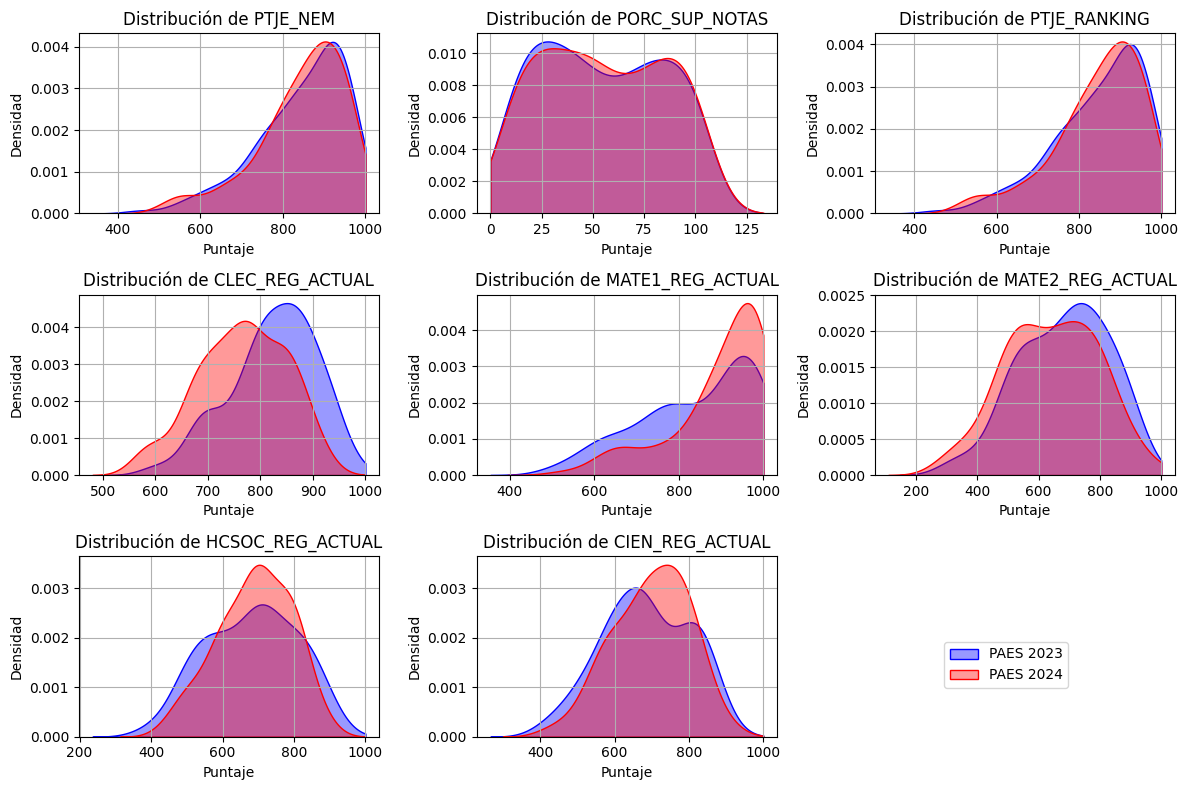

In [22]:
# graficamos los puntajes de cada prueba
# queremos un grafico por cada prueba
plt.figure(figsize=(12, 8))
for prueba in nombre_pruebas:
    plt.subplot(3, 3, nombre_pruebas.index(prueba) + 1)
    sns.kdeplot(puntajes_2023[prueba], fill=True, alpha=0.4, color='blue', gridsize=200, clip=(0, 1000))
    sns.kdeplot(puntajes_2024[prueba], fill=True, alpha=0.4, color='red', gridsize=200, clip=(0, 1000))
    #plt.hist([puntajes_2023[prueba], puntajes_2024[prueba]], bins=20, color=['blue', 'red'], alpha=0.5, label=['PAES 2023', 'PAES 2024'])
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Densidad')
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024'], bbox_to_anchor=(0.9, 0.2))
plt.show()

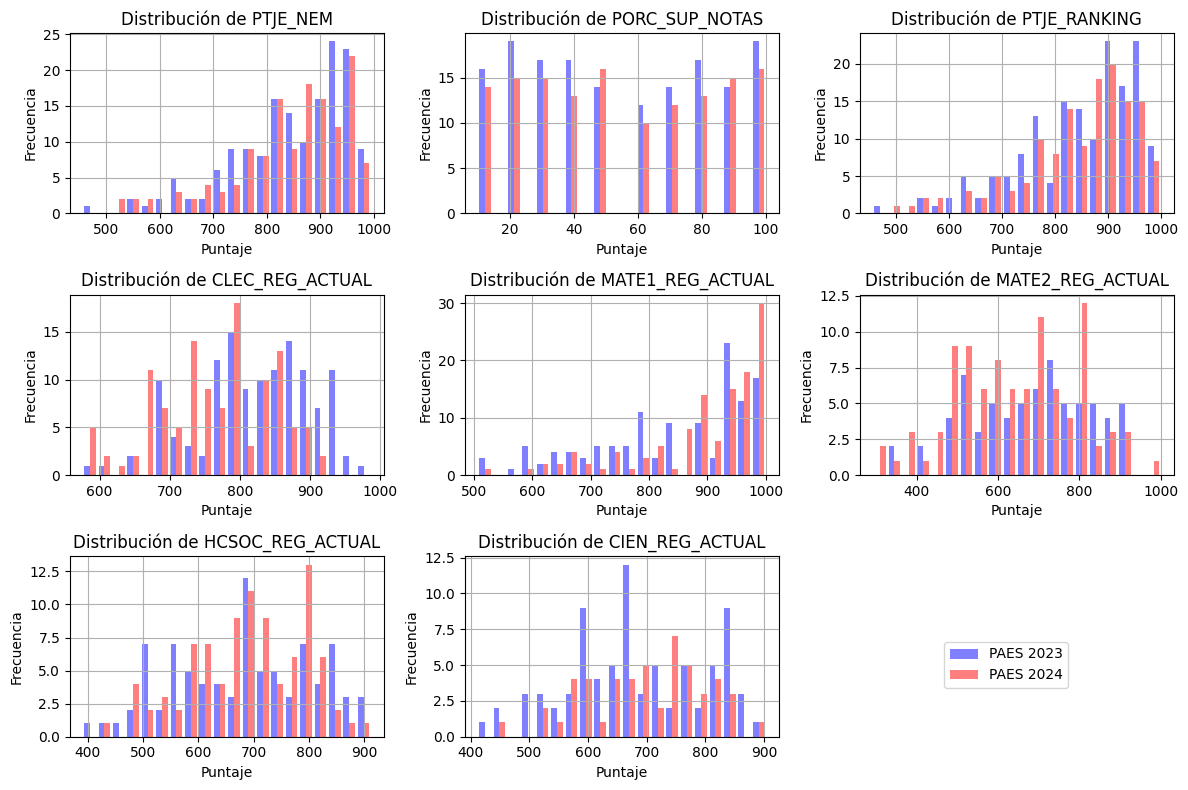

In [23]:
# graficamos los puntajes de cada prueba
# queremos un grafico por cada prueba
plt.figure(figsize=(12, 8))
for prueba in nombre_pruebas:
    plt.subplot(3, 3, nombre_pruebas.index(prueba) + 1)
    #sns.kdeplot(puntajes_2023[prueba], fill=True, alpha=0.5, palette='Blues')
    #sns.histplot(puntajes_2023[prueba], fill=True, alpha=0.5, color='blue')
    #sns.kdeplot(puntajes_2024[prueba], fill=True, alpha=0.5, palette='Reds')
    #sns.histplot(puntajes_2024[prueba], fill=True, alpha=0.5, color='red')
    plt.hist([puntajes_2023[prueba], puntajes_2024[prueba]], bins=20, color=['blue', 'red'], alpha=0.5, label=['PAES 2023', 'PAES 2024'])
    plt.title(f'Distribución de {prueba}')
    plt.xlabel('Puntaje')
    plt.ylabel('Frecuencia')
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024'], bbox_to_anchor=(0.9, 0.2))
plt.show()

## Puntajes de Cada Prueba vs. NEM

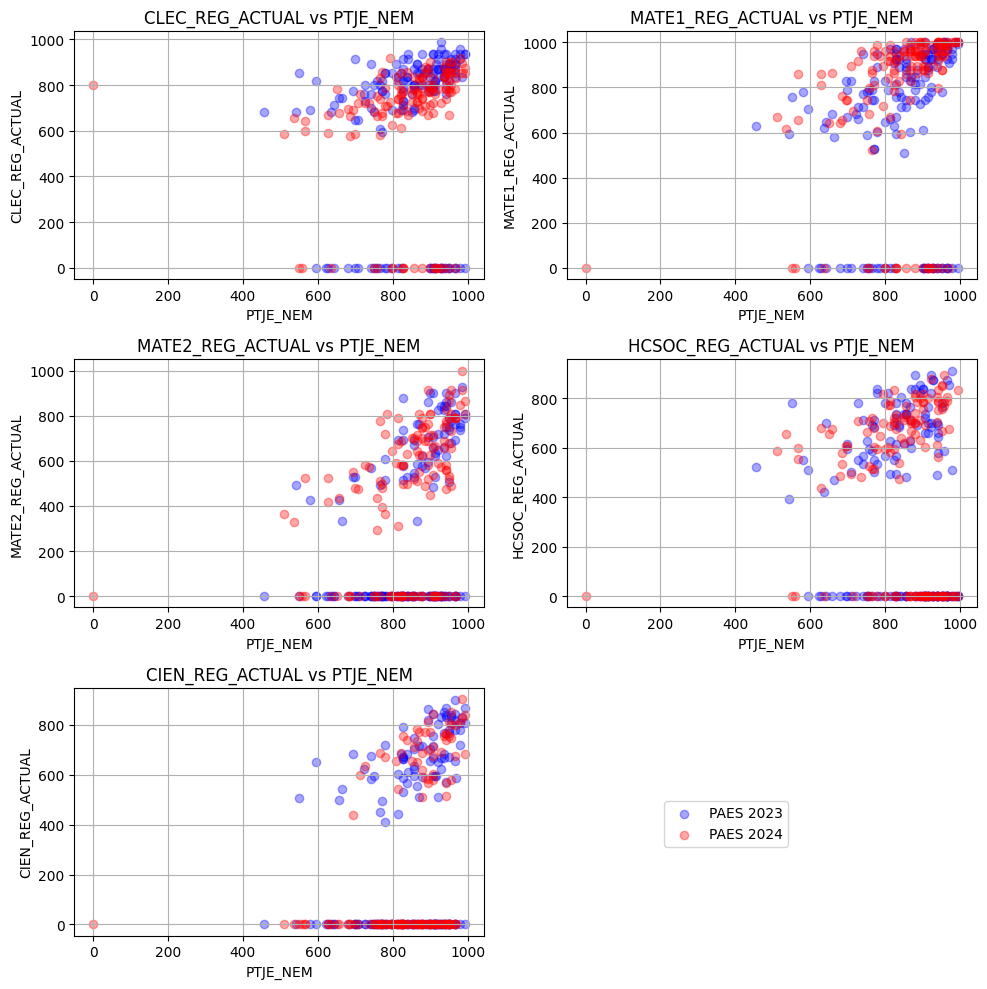

In [66]:
# plot de los puntajes para cada prueba vs PTJE_NEM
plt.figure(figsize=(10, 10))
idx = 1
for prueba in nombre_pruebas:
    if prueba == 'PTJE_NEM' or prueba == 'PTJE_RANKING' or prueba == 'PORC_SUP_NOTAS':
        continue
    # plot in a 2x3 grid
    plt.subplot(3, 2, idx)
    idx += 1
    plt.scatter(puntajes_2023['PTJE_NEM'], puntajes_2023[prueba], alpha=0.35, color='blue', label='PAES 2023')
    plt.scatter(puntajes_2024['PTJE_NEM'], puntajes_2024[prueba], alpha=0.35, color='red', label='PAES 2024')
    plt.title(f'{prueba} vs PTJE_NEM')
    plt.xlabel('PTJE_NEM')
    plt.ylabel(prueba)
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024'], bbox_to_anchor=(0.8, 0.2))
plt.show()

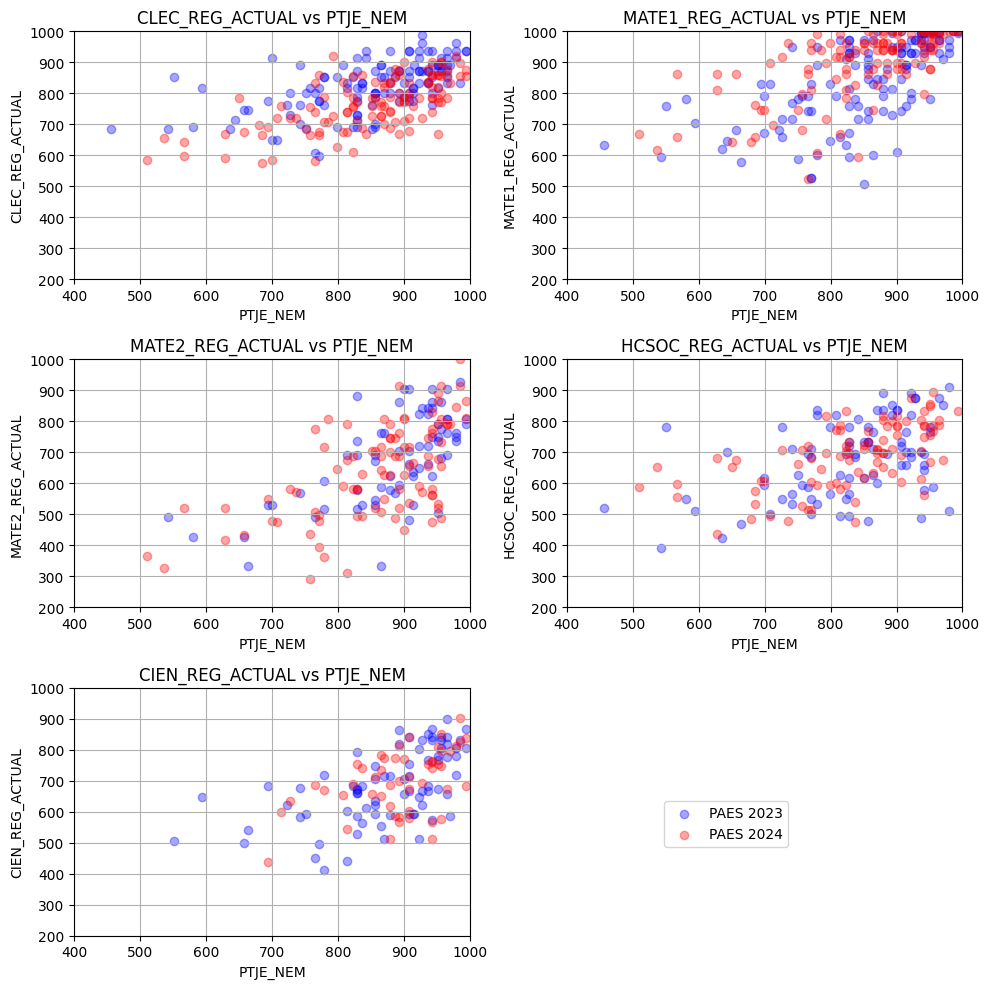

In [65]:
# plot de los puntajes para cada prueba vs PTJE_NEM
plt.figure(figsize=(10, 10))
idx = 1
for prueba in nombre_pruebas:
    if prueba == 'PTJE_NEM' or prueba == 'PTJE_RANKING' or prueba == 'PORC_SUP_NOTAS':
        continue
    # plot in a 2x3 grid
    plt.subplot(3, 2, idx)
    idx += 1
    plt.scatter(puntajes_2023['PTJE_NEM'], puntajes_2023[prueba], alpha=0.35, color='blue', label='PAES 2023')
    plt.scatter(puntajes_2024['PTJE_NEM'], puntajes_2024[prueba], alpha=0.35, color='red', label='PAES 2024')
    plt.title(f'{prueba} vs PTJE_NEM')
    plt.xlabel('PTJE_NEM')
    plt.xlim(400, 1000)
    plt.ylim(200, 1000)
    plt.ylabel(prueba)
    plt.grid(True)
plt.tight_layout()
plt.figlegend(labels=['PAES 2023', 'PAES 2024'], bbox_to_anchor=(0.8, 0.2))
plt.show()

# Validación de los datos

Objetivo: Validar si las distribuciones de puntajes en distintas pruebas son similares entre 2023 y 2024. Si lo son, eso justifica usar datos de ambos años en modelos o análisis conjuntos.


###  1. Test t de Student (para comparar medias)

In [4]:
# cargamos datos de PAES 2023 y 2024
df_paes = pd.read_excel('../Datos/paes_encrypted.xlsx', skiprows=1)
df_paes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nombre      324 non-null    object
 1   RUT         324 non-null    object
 2   Admisión    324 non-null    int64 
 3   C. Lectora  324 non-null    object
 4   Matemática  324 non-null    object
 5   M2          324 non-null    object
 6   Historia    324 non-null    object
 7   Ciencias    324 non-null    object
dtypes: int64(1), object(7)
memory usage: 20.4+ KB


In [5]:
df_paes_2023 = df_paes[df_paes['Admisión'] == 2023].copy()
df_paes_2024 = df_paes[df_paes['Admisión'] == 2024].copy()
df_paes_2025 = df_paes[df_paes['Admisión'] == 2025].copy()

In [6]:
nombre_pruebas = ['C. Lectora', 'Matemática', 'Historia', 'Ciencias', 'M2']

#### 2023 vs 2024

In [7]:
from scipy.stats import ttest_ind

# Asumiendo que tienes los datos ya convertidos a float y sin valores nulos
t_stats = {}
for prueba in nombre_pruebas:
    x = pd.to_numeric(df_paes_2023[prueba], errors='coerce').dropna()
    y = pd.to_numeric(df_paes_2024[prueba], errors='coerce').dropna()
    stat, pval = ttest_ind(x, y, equal_var=False)
    t_stats[prueba] = (stat, pval)

pd.DataFrame.from_dict(t_stats, orient='index', columns=["T-statistic", "p-value"])


,T-statistic,p-value
C. Lectora,5.232198,3.888368e-07
Matemática,-3.491827,5.824224e-04
Historia,-0.542327,5.884409e-01
Ciencias,-0.921378,3.587496e-01
M2,1.357378,1.767872e-01


#### 2024 vs 2025

In [9]:
from scipy.stats import ttest_ind

# Asumiendo que tienes los datos ya convertidos a float y sin valores nulos
t_stats = {}
for prueba in nombre_pruebas:
    x = pd.to_numeric(df_paes_2024[prueba], errors='coerce').dropna()
    y = pd.to_numeric(df_paes_2025[prueba], errors='coerce').dropna()
    stat, pval = ttest_ind(x, y, equal_var=False)
    t_stats[prueba] = (stat, pval)

pd.DataFrame.from_dict(t_stats, orient='index', columns=["T-statistic", "p-value"])

,T-statistic,p-value
C. Lectora,-0.088361,0.929679
Matemática,-1.082545,0.280277
Historia,-3.098689,0.002375
Ciencias,-2.604630,0.013022
M2,-4.423655,0.000027


#### 2023 y 2024 vs 2025

In [10]:

# Asumiendo que tienes los datos ya convertidos a float y sin valores nulos
t_stats = {}
df_x = pd.concat([df_paes_2023[nombre_pruebas], df_paes_2024[nombre_pruebas]], axis=0)
for prueba in nombre_pruebas:
    x = pd.to_numeric(df_x[prueba], errors='coerce').dropna()
    y = pd.to_numeric(df_paes_2025[prueba], errors='coerce').dropna()
    stat, pval = ttest_ind(x, y, equal_var=False)
    t_stats[prueba] = (stat, pval)

pd.DataFrame.from_dict(t_stats, orient='index', columns=["T-statistic", "p-value"])

,T-statistic,p-value
C. Lectora,2.557985,0.011365
Matemática,-3.329319,0.001019
Historia,-3.556049,0.000537
Ciencias,-3.152321,0.003582
M2,-4.266754,0.000062


### 2. Mann–Whitney U Test – Compara tendencias centrales/medianas

In [14]:
from scipy.stats import mannwhitneyu

mw_stats = {}
for prueba in nombre_pruebas:
    x = pd.to_numeric(df_paes_2023[prueba], errors='coerce').dropna()
    y = pd.to_numeric(df_paes_2024[prueba], errors='coerce').dropna()
    stat, pval = mannwhitneyu(x, y, alternative='two-sided')
    mw_stats[prueba] = (stat, pval)

pd.DataFrame.from_dict(mw_stats, orient='index', columns=["U-statistic", "p-value"])


,U-statistic,p-value
C. Lectora,8582.5,8.604982e-07
Matemática,4675.0,1.389849e-03
Historia,3002.5,6.941035e-01
Ciencias,1763.0,3.907383e-01
M2,3376.5,1.577792e-01


Conclusiones de los dos tests anteriores:

Las pruebas de matemáticas (MATE1 y MATE2), ciencias (CIEN) y competencia lectora (CLEC) sí cambiaron de manera significativa entre 2023 y 2024.

Las pruebas de historia (HCSOC) podrían haber cambiado, pero el resultado no es fuerte (p ≈ 0.07).

Las pruebas como NEM, RANKING y PORC_SUP_NOTAS no muestran cambios estadísticamente significativos: puedes asumir que son estables.

### 3. test de Kolmogorov-Smirnov (KS)

In [12]:
from scipy.stats import ks_2samp

# Guardamos los resultados de los tests
ks_results = {}

for prueba in nombre_pruebas:
    data_2023 = pd.to_numeric(df_paes_2023[prueba], errors='coerce').dropna()
    data_2024 = pd.to_numeric(df_paes_2024[prueba], errors='coerce').dropna()

    stat, p_value = ks_2samp(data_2023, data_2024)
    ks_results[prueba] = {'KS statistic': stat, 'p-value': p_value}

# Mostramos los resultados ordenados por p-valor
import pandas as pd
pd.DataFrame(ks_results).T.sort_values(by='p-value')


,KS statistic,p-value
C. Lectora,0.362707,4.723615e-07
Matemática,0.263077,6.591605e-04
Historia,0.156290,2.537364e-01
Ciencias,0.173375,2.776475e-01
M2,0.151434,3.043205e-01


In [13]:
for prueba in nombre_pruebas:
    data_2024 = pd.to_numeric(df_paes_2024[prueba], errors='coerce').dropna()
    data_2025 = pd.to_numeric(df_paes_2025[prueba], errors='coerce').dropna()

    stat, p_value = ks_2samp(data_2024, data_2025)
    ks_results[prueba] = {'KS statistic': stat, 'p-value': p_value}

# Mostramos los resultados ordenados por p-valor
import pandas as pd
pd.DataFrame(ks_results).T.sort_values(by='p-value')

,KS statistic,p-value
Matemática,0.273945,0.000580
M2,0.363802,0.001290
Historia,0.285908,0.002794
Ciencias,0.421961,0.003643
C. Lectora,0.134679,0.267226


In [14]:
df_x = pd.concat([df_paes_2023[nombre_pruebas], df_paes_2024[nombre_pruebas]], axis=0)
for prueba in nombre_pruebas:
    data_2023_24 = pd.to_numeric(df_x[prueba], errors='coerce').dropna()
    data_2025 = pd.to_numeric(df_paes_2025[prueba], errors='coerce').dropna()

    stat, p_value = ks_2samp(data_2023_24, data_2025)
    ks_results[prueba] = {'KS statistic': stat, 'p-value': p_value}

# Mostramos los resultados ordenados por p-valor
import pandas as pd
pd.DataFrame(ks_results).T.sort_values(by='p-value')

,KS statistic,p-value
Matemática,0.288879,0.000014
Historia,0.269339,0.001153
M2,0.327789,0.002296
Ciencias,0.386142,0.002607
C. Lectora,0.182556,0.017110


# Cruce SEPA y PAES

In [16]:
df_paes = pd.read_excel('../Datos/paes_encrypted.xlsx', skiprows=1)
df_sepa = pd.read_csv('../Datos/df_pruebas_sepa.csv')
print(df_paes.columns)
print(df_sepa.columns)

Index(['Nombre', 'RUT', 'Admisión', 'C. Lectora', 'Matemática', 'M2',
       'Historia', 'Ciencias'],
      dtype='object')
Index(['id', 'mat_1', 'mat_2', 'mat_3', 'mat_4', 'mat_5', 'mat_6', 'mat_7',
       'mat_8', 'mat_9', 'mat_10', 'mat_11', 'mat_12', 'leng_1', 'leng_2',
       'leng_3', 'leng_4', 'leng_5', 'leng_6', 'leng_7', 'leng_8', 'leng_9',
       'leng_10', 'leng_11', 'leng_12', 'student_rut'],
      dtype='object')


## Graficar desempeño SEPA vs. PAES

In [17]:
df_perf = df_sepa.merge(df_paes, left_on='student_rut', right_on='RUT', how='inner')
df_perf.replace('-', np.nan, inplace=True) # reemplazar '-' por NaN (de flojo)
df_perf = df_perf.astype({'C. Lectora': 'float', 'Matemática': 'float', 'Historia': 'float', 'Ciencias': 'float', 'M2': 'float'})
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           324 non-null    int64  
 1   mat_1        324 non-null    float64
 2   mat_2        324 non-null    float64
 3   mat_3        324 non-null    float64
 4   mat_4        324 non-null    float64
 5   mat_5        324 non-null    float64
 6   mat_6        324 non-null    float64
 7   mat_7        324 non-null    float64
 8   mat_8        324 non-null    float64
 9   mat_9        324 non-null    float64
 10  mat_10       324 non-null    float64
 11  mat_11       324 non-null    float64
 12  mat_12       324 non-null    float64
 13  leng_1       324 non-null    float64
 14  leng_2       324 non-null    float64
 15  leng_3       324 non-null    float64
 16  leng_4       324 non-null    float64
 17  leng_5       324 non-null    float64
 18  leng_6       324 non-null    float64
 19  leng_7  

In [19]:
leng = ['leng_'+str(i) for i in range(1, 13)]
mat = ['mat_'+str(i) for i in range(1, 13)]
df_perf['avg_leng'] = df_perf[leng].mean(axis=1)
df_perf['avg_mat'] = df_perf[mat].mean(axis=1)

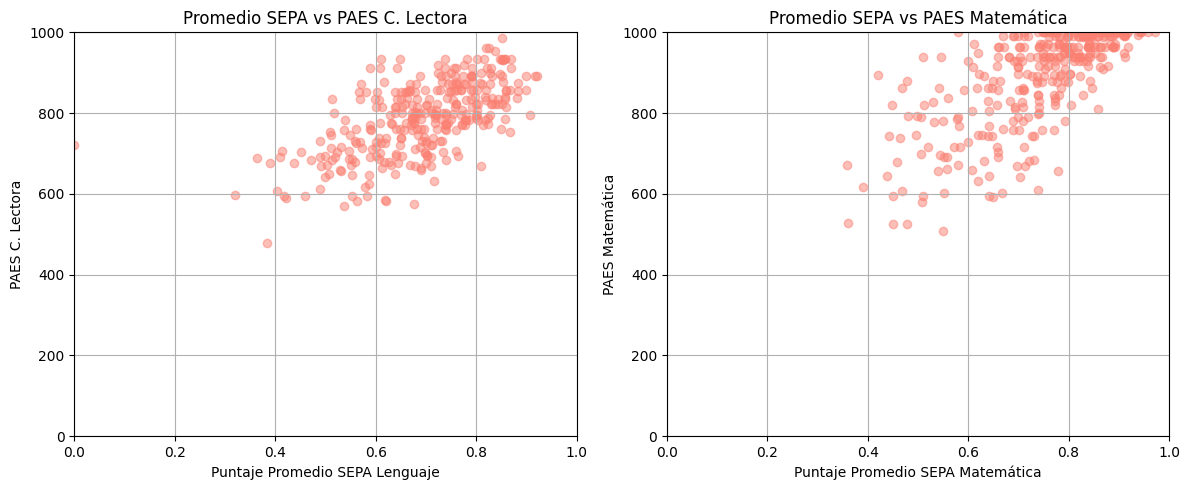

In [35]:
pruebas = ['C. Lectora', 'Matemática']
# graficamos scatter plot de average_score vs C. Lectora
plt.figure(figsize=(12, 5))
for prueba in pruebas:
    plt.subplot(1, 2, pruebas.index(prueba) + 1)
    if prueba == 'C. Lectora':
        plt.scatter(df_perf['avg_leng'], df_perf[prueba], alpha=0.5, color='salmon')
    else:
        plt.scatter(df_perf['avg_mat'], df_perf[prueba], alpha=0.5, color='salmon')
    plt.title(f'Promedio SEPA vs PAES {prueba}')
    if prueba == 'C. Lectora':
        plt.xlabel('Puntaje Promedio SEPA Lenguaje')
    else:
        plt.xlabel('Puntaje Promedio SEPA Matemática')
    plt.ylabel('PAES ' + prueba)
    plt.xlim(0.0, 1.0)
    plt.ylim(0, 1000)
    plt.grid(True)
plt.tight_layout()
plt.savefig('../Resultados/scatter_sepa_paes.png', dpi=300)
plt.show()

## Graficar desempeño SEPA (por separado) vs. PAES

Ahora tendremos el puntaje promedio para la prueba de matemáticas y de lenguaje por separado.

In [35]:
# Consulta SQL para calcular el promedio de puntaje por estudiante
sql_str = """
SELECT 
    s.id AS student_id,
    s.fullname AS student_name,
    s.rut AS student_rut,
    ROUND(AVG(CASE WHEN q.statement LIKE 'SEPA Leng%' THEN a.score END), 2) AS average_leng_score,
    ROUND(AVG(CASE WHEN q.statement LIKE 'SEPA Mat%' THEN a.score END), 2) AS average_mat_score,
    COUNT(a.id) AS num_answers
FROM answer a
JOIN student s ON s.id = a.student_id
JOIN question q ON q.id = a.question_id
GROUP BY s.id
"""
df_student_perf_2 = pd.read_sql(sql=sql_text(sql_str), con=engine.connect()) # para versiones mas nuevas de sqlalchemy
df_student_perf_2.head()

,student_id,student_name,student_rut,average_leng_score,average_mat_score,num_answers
0,790,Maria Jose,425141575e5d5f59,0.71,0.71,399
1,2850,Agustin,4254425458575959,0.53,0.63,60
2,1798,Matias Jose,425240505b5f515f,0.53,0.67,490
3,1489,Augusto,425344595a575d5a,0.68,0.93,420
4,1269,Juan Diego,425049585f56505a,0.92,0.80,50


In [59]:
# mergear df_encrypted (RUT) con df_student_perf (sudent_rut)
df_perf = df_student_perf_2.merge(df_encrypted, left_on='student_rut', right_on='RUT', how='inner')
df_perf.replace('-', np.nan, inplace=True) # reemplazar '-' por NaN (de flojo)
df_perf = df_perf.astype({'C. Lectora': 'float', 'Matemática': 'float', 'Historia': 'float', 'Ciencias': 'float'})
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          324 non-null    int64  
 1   student_name        324 non-null    object 
 2   student_rut         324 non-null    object 
 3   average_leng_score  323 non-null    float64
 4   average_mat_score   324 non-null    float64
 5   num_answers         324 non-null    int64  
 6   Nombre              320 non-null    object 
 7   RUT                 324 non-null    object 
 8   Admisión            324 non-null    int64  
 9   C. Lectora          323 non-null    float64
 10  Matemática          323 non-null    float64
 11  M2                  193 non-null    float64
 12  Historia            230 non-null    float64
 13  Ciencias            152 non-null    float64
 14  RUT_NUM             324 non-null    object 
dtypes: float64(7), int64(3), object(5)
memory usage: 40.5+ KB

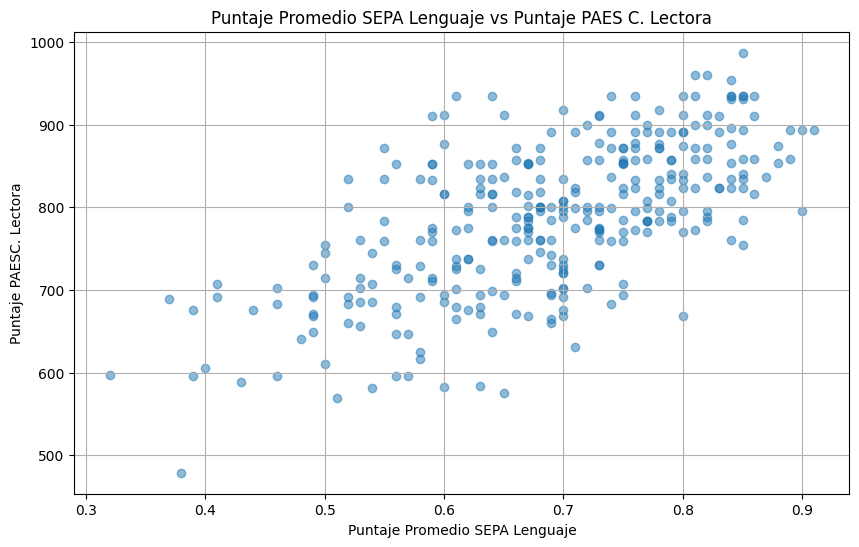

In [60]:
# graficamos scatter plot de average_score vs C. Lectora
plt.figure(figsize=(10, 6))
plt.scatter(df_perf['average_leng_score'], df_perf['C. Lectora'], alpha=0.5)
plt.title('Puntaje Promedio SEPA Lenguaje vs Puntaje PAES C. Lectora')
plt.xlabel('Puntaje Promedio SEPA Lenguaje')
plt.ylabel('Puntaje PAESC. Lectora')
plt.grid(True)
plt.show()

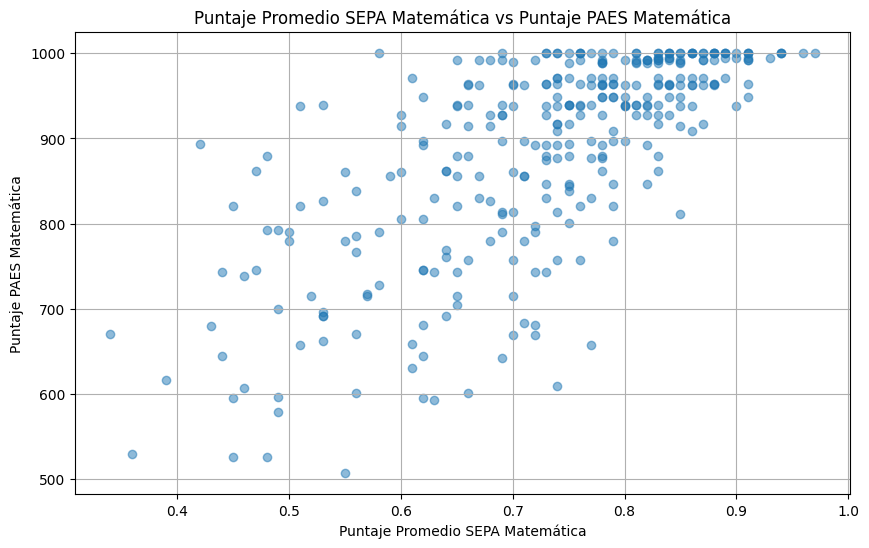

In [61]:
# graficamos scatter plot de average_score vs Matemática
plt.figure(figsize=(10, 6))
plt.scatter(df_perf['average_mat_score'], df_perf['Matemática'], alpha=0.5)
plt.title('Puntaje Promedio SEPA Matemática vs Puntaje PAES Matemática')
plt.xlabel('Puntaje Promedio SEPA Matemática')
plt.ylabel('Puntaje PAES Matemática')
plt.grid(True)
plt.show()

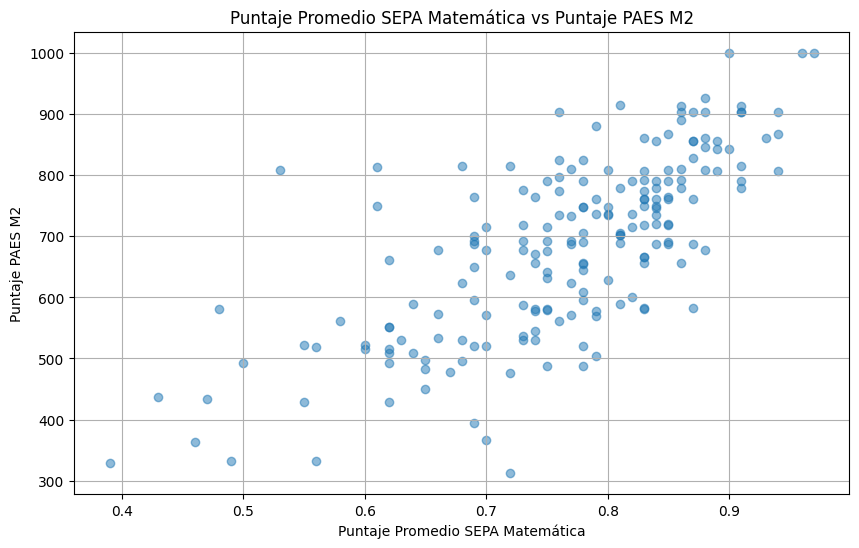

In [63]:
# graficamos scatter plot de average_score vs Matemática
plt.figure(figsize=(10, 6))
plt.scatter(df_perf['average_mat_score'], df_perf['M2'], alpha=0.5)
plt.title('Puntaje Promedio SEPA Matemática vs Puntaje PAES M2')
plt.xlabel('Puntaje Promedio SEPA Matemática')
plt.ylabel('Puntaje PAES M2')
plt.grid(True)
plt.show()